In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder # đọc dữ liệu 
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader

In [2]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 640.0 kB/s eta 0:01:01
   ---------------------------------------- 0.1/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.3/38.6 MB 2.7 MB/s eta 0:00:15
    --------------------------------------- 0.7/38.6 MB 4.5 MB/s eta 0:00:09
   - -------------------------------------- 1.7/38.6 MB 8.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/38.6 MB 11.1 MB/s eta 0:00:04
   --- ------------------------------------ 3.2/38.6 MB 12.0 MB/s eta 0:00:03
   --- ------------------------------------ 3.3/38.6 MB 10.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.4/38.6 MB 14.4 MB/s eta 0:00:03
   ------ 

#### Download dataset

In [90]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: .\cifar10.tgz


In [91]:
# # Extract from archive
# with tarfile.open('./cifar10.tgz', 'r:gz') as tar:# đọc file gzip,r là read
#     tar.extractall(path='./data')

In [2]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#### View number of any samples

In [93]:
cat_files = os.listdir(data_dir+"//train//cat")
print("Number of cat images: ",len(cat_files))


Number of cat images:  5000


In [17]:
dog_files = os.listdir(data_dir+"/train/dog")
print("Number of dog images: ",len(dog_files))



Number of dog images:  5000


In [18]:
dog_files = os.listdir(data_dir+"/test/dog")
print("Number of dog images: ",len(dog_files))

Number of dog images:  1000


In [3]:
data_cifar10 = ImageFolder(data_dir+'/train', transform=ToTensor())

data_cifar10 # lưu trữ lại toàn bộ ảnh và chuyển thành tensor

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./data/cifar10/train
    StandardTransform
Transform: ToTensor()

In [5]:
#check size ảnh
img,label = data_cifar10[1]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.4941, 0.4784, 0.4941,  ..., 0.4863, 0.4706, 0.4588],
         [0.4784, 0.4667, 0.4745,  ..., 0.4863, 0.4784, 0.4588],
         [0.4784, 0.4745, 0.4745,  ..., 0.4941, 0.4824, 0.4745],
         ...,
         [0.4941, 0.4941, 0.5020,  ..., 0.5216, 0.4784, 0.4471],
         [0.4902, 0.4941, 0.4980,  ..., 0.5020, 0.4745, 0.4471],
         [0.4824, 0.4824, 0.4941,  ..., 0.5020, 0.4941, 0.4745]],

        [[0.4627, 0.4510, 0.4667,  ..., 0.4627, 0.4471, 0.4353],
         [0.4510, 0.4392, 0.4471,  ..., 0.4627, 0.4549, 0.4353],
         [0.4510, 0.4471, 0.4471,  ..., 0.4706, 0.4588, 0.4510],
         ...,
         [0.4627, 0.4627, 0.4706,  ..., 0.4902, 0.4471, 0.4157],
         [0.4588, 0.4627, 0.4667,  ..., 0.4706, 0.4431, 0.4157],
         [0.4510, 0.4510, 0.4627,  ..., 0.4667, 0.4627, 0.4431]],

        [[0.4314, 0.4235, 0.4353,  ..., 0.4157, 0.4000, 0.3882],
         [0.4196, 0.4078, 0.4157,  ..., 0.4157, 0.4078, 0.3882],
         [0.4196, 0.4157, 0.4157,  ..., 0.4235, 0.4118, 0.

In [96]:
data_cifar10.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [97]:
# tạo ra một hàm show thử ảnh 
def show_image(img,label):
    print("label: ",data_cifar10.classes[label])
    plt.imshow(img.permute(1,2,0)) # đảo lại chiều để plt đọc được 

label:  airplane


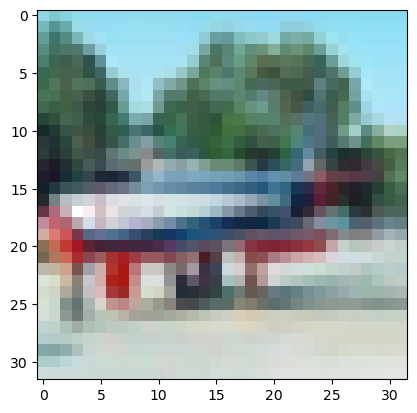

In [98]:
show_image(*data_cifar10[501])

#### Training and validation datasets

In [6]:
random_seed = 42
torch.manual_seed(random_seed)

In [7]:
len(data_cifar10)

50000

In [8]:
val_size = 5000
train_size = len(data_cifar10) - val_size

# tạo ra 2 tệp train và val từ data_cifar10
train_data, val_data = random_split(data_cifar10, [train_size, val_size])
len(train_data), len(val_data)

(45000, 5000)

In [9]:
batch_size =  64
train_dl = DataLoader(train_data,batch_size,shuffle=True,pin_memory=True)# dữ liệu được sao chép vào bộ nhớ gpu để tăng tốc độ tải dữ liệu
val_dl = DataLoader(val_data,batch_size,shuffle=True,pin_memory=True)

In [10]:
# check ảnh trong train dl
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])# tắt các đường trục x,y để k hiển thị
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

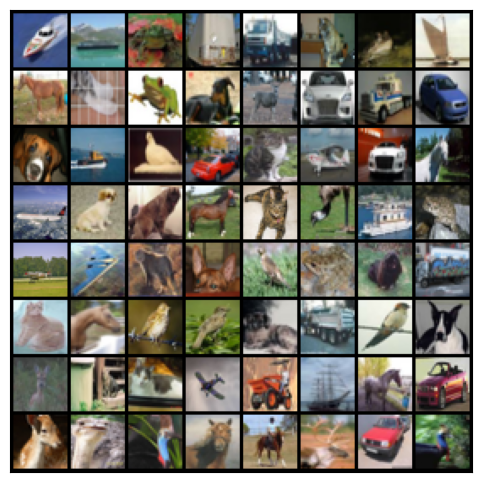

In [104]:
show_batch(train_dl)

#### Building model 

In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss( loss giữa dự đoán và thực tế)
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}# detach(): tạo ra bản sao của loss nhưng không gradient
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # xếp chồng các tensor trong batchloss
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Output của convolutional layer sẽ qua hàm activation function trước khi trở thành input của convolutional layer tiếp theo.\
Pooling layer\
Pooling layer thường được dùng giữa các convolutional layer, để giảm kích thước dữ liệu nhưng vẫn giữ được các thuộc tính quan trọng. Kích thước dữ liệu giảm giúp giảm việc tính toán trong model.

In [107]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),# đầu vào là 3 channel màu,
             # áp dụng convolution với 32 kernel với kernel size, kết quả là 32 ma trận có cùng size với ma trận đầu vào(vì đã padding = 1)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16(giảm size đầu ra 64 ma trận, mỗi ma trận size 16x16)

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            # Fully connected
            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            
        )

        
    def forward(self, xb):
        return self.network(xb)# định nghĩa dữ liệu truyenf qua mạng

In [70]:
# import torch
# import torch.nn as nn

# # Tạo một tensor ảnh đơn kênh 4x4
# sample_image = torch.tensor([[1, 2, 3, 4],
#                              [5, 6, 7, 8],
#                              [9, 10, 11, 12],
#                              [13, 14, 15, 16]], dtype=torch.float32)

# # Mở rộng kích thước tensor để có ba chiều (1 kênh, chiều cao 4, chiều rộng 4)
# sample_image = sample_image.unsqueeze(0).unsqueeze(0)

# # Định nghĩa lớp Conv2d với 1 kênh đầu vào và 2 kênh đầu ra, kernel_size=3 và padding=0
# conv_layer = nn.Conv2d(3, 10, kernel_size=3, padding=1)
# sample_image_3_channels = torch.cat([sample_image, sample_image, sample_image], dim=1)

# # Áp dụng lớp Conv2d lên tensor ảnh
# output_image = conv_layer(sample_image_3_channels)

# # In kết quả
# print("Input Image Tensor:")
# print(sample_image_3_channels)
# print("\nOutput Image Tensor after Conv2d:")
# print(len(output_image))
# print(output_image)



In [108]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [109]:
for images, labels in train_dl:
    print('images.shape:', images.shape)# 64 ảnh(batchsize), 3 channel màu, mỗi ảnh size 32x32
    out = model(images)
    print('out.shape:', out.shape)
    
    break

images.shape: torch.Size([64, 3, 32, 32])
out.shape: torch.Size([64, 10])


In [16]:
def get_default_device():
    
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    
    if isinstance(data, (list,tuple)):# check xem data có thuộc list or tuple
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)# non_blocking: tăng tốc qtrinh chuyển đổi trên gpu

class DeviceDataLoader():# bọc đối tg DataLoader và di chuyển mỗi batch data từ đối tg đến cuda
    
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Với mỗi lần lặp qua self.dl, yield to_device(b, self.device) sinh ra giá trị và tạm dừng hàm generator. Giá trị này được trả về cho người gọi hàm, và sau đó hàm giữ lại trạng thái của nó. Khi hàm generator được gọi lần tiếp theo, nó tiếp tục từ câu lệnh yield và tiếp tục lặp qua self.dl. Điều này giúp tạo ra một giao diện lặp thông qua dữ liệu một cách tiện lợi mà không cần phải lưu trữ toàn bộ dữ liệu trong bộ nhớ.

In [40]:
device = get_default_device()
device

device(type='cuda')

In [39]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)


#### Training Model

In [20]:
@torch.no_grad() # decorator từ pytorch.Tắt đạo hàm khi đánh giá model,
# giảm tải cho GPU và tăng tốc quá trình đánh giá, ngăn chặn cập nhật trọng số
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)# tạo một optimizer
    for epoch in range(epochs):
        # Training Phase 
        model.train() # đặt vào ché độ huấn luyện, cái này từ nn.Module
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward() # tính toán gradient của các tham số theo loss
            optimizer.step()# update trọng số
            optimizer.zero_grad()# đặt gradient về zero để cbi cho batch tiếp theo
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [115]:
model = to_device(Cifar10CnnModel(), device)

In [116]:
# khởi tạo hyperparameter
epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [117]:
history = fit(epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.6562, val_loss: 1.2676, val_acc: 0.5291
Epoch [1], train_loss: 1.1343, val_loss: 1.0586, val_acc: 0.6212
Epoch [2], train_loss: 0.8891, val_loss: 0.8353, val_acc: 0.7061
Epoch [3], train_loss: 0.7268, val_loss: 0.8269, val_acc: 0.7191
Epoch [4], train_loss: 0.5994, val_loss: 0.7957, val_acc: 0.7310
Epoch [5], train_loss: 0.4880, val_loss: 0.7684, val_acc: 0.7520
Epoch [6], train_loss: 0.3918, val_loss: 0.7754, val_acc: 0.7623
Epoch [7], train_loss: 0.3063, val_loss: 0.8161, val_acc: 0.7601
Epoch [8], train_loss: 0.2452, val_loss: 0.9643, val_acc: 0.7607
Epoch [9], train_loss: 0.1963, val_loss: 1.0546, val_acc: 0.7514


In [118]:
# plot validation set accuracies
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

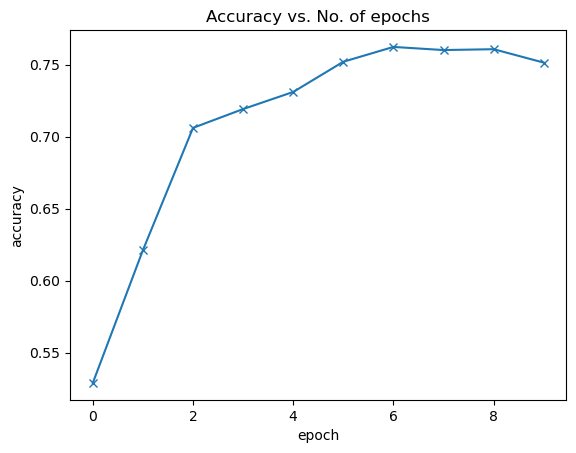

In [119]:
plot_accuracies(history)


In [120]:
# plot losses
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

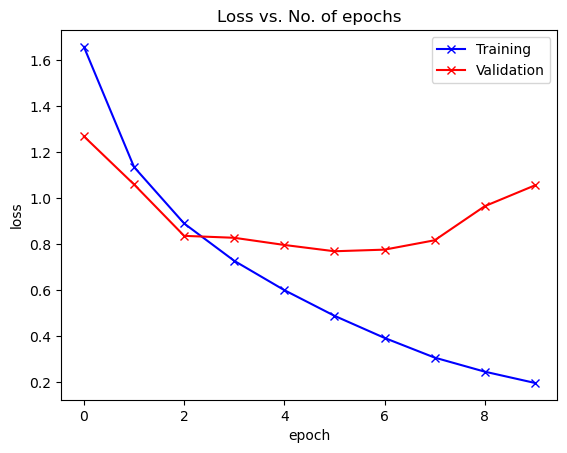

In [121]:
plot_losses(history)


### Như kết quả thấy thì loss của training đi xuống trong khi loss của validation đã dừng việc hạ xuống ở epochs thứ 2, và sau đó có xu hướng tăng dần

In [162]:
### Thử thêm dropout vào các lớp ẩn
class Cifar10CnnModel_fix1(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),# đầu vào là 3 channel màu,
             # áp dụng convolution với 32 kernel với kernel size, kết quả là 32 ma trận có cùng size với ma trận đầu vào(vì đã padding = 1)
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.25),
             
            # Fully connected
            nn.Flatten(), 
            nn.Linear(64*4*4, 1000),
            nn.ReLU(),
            nn.Linear(1000, 10),
            nn.Dropout(0.25)
            
        )

        
    def forward(self, xb):
        return self.network(xb)# định nghĩa dữ liệu truyenf qua mạng

In [163]:
model1 = to_device(Cifar10CnnModel_fix1(), device)


In [164]:
epochs1 = 21
lr1 = 0.001
opt_func1 = torch.optim.Adam
history = fit(epochs1, lr1, model1, train_dl, val_dl, opt_func1)

Epoch [0], train_loss: 1.7224, val_loss: 1.2790, val_acc: 0.5494
Epoch [1], train_loss: 1.4226, val_loss: 1.1209, val_acc: 0.6220
Epoch [2], train_loss: 1.2730, val_loss: 0.9806, val_acc: 0.6572
Epoch [3], train_loss: 1.1702, val_loss: 0.9594, val_acc: 0.6760
Epoch [4], train_loss: 1.0785, val_loss: 0.8675, val_acc: 0.7033
Epoch [5], train_loss: 1.0017, val_loss: 0.8966, val_acc: 0.6940
Epoch [6], train_loss: 0.9291, val_loss: 0.8050, val_acc: 0.7209
Epoch [7], train_loss: 0.8665, val_loss: 0.8263, val_acc: 0.7162
Epoch [8], train_loss: 0.8140, val_loss: 0.7953, val_acc: 0.7247
Epoch [9], train_loss: 0.7603, val_loss: 0.7999, val_acc: 0.7342
Epoch [10], train_loss: 0.7201, val_loss: 0.8100, val_acc: 0.7265
Epoch [11], train_loss: 0.6692, val_loss: 0.8496, val_acc: 0.7286
Epoch [12], train_loss: 0.6262, val_loss: 0.9177, val_acc: 0.7201
Epoch [13], train_loss: 0.5967, val_loss: 0.9077, val_acc: 0.7296
Epoch [14], train_loss: 0.5679, val_loss: 0.9306, val_acc: 0.7294
Epoch [15], train_lo

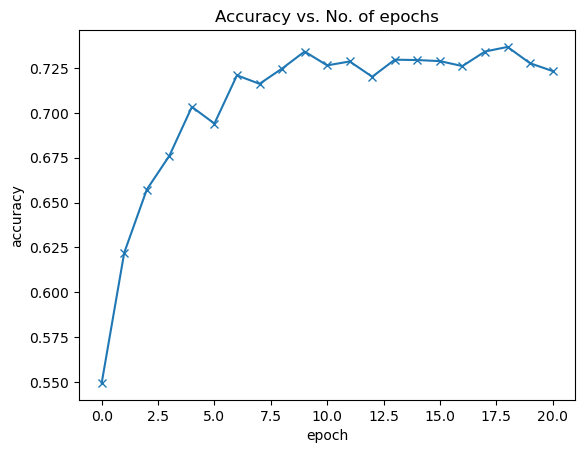

In [166]:
plot_accuracies(history)

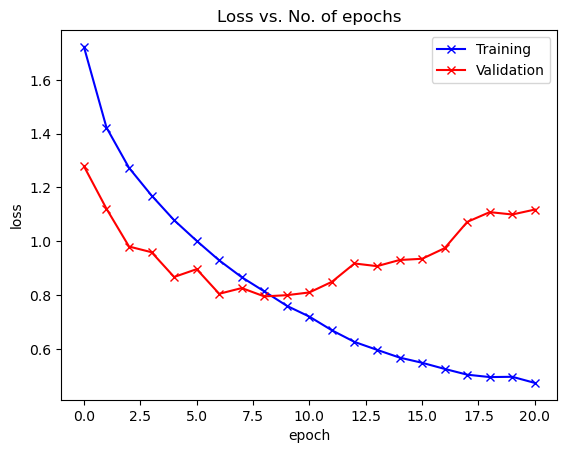

In [167]:
plot_losses(history)

In [48]:

class AlexNet(ImageClassificationBase):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        
        self.classifier = nn.Sequential(
            
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Định nghĩa mô hình
model = AlexNet(num_classes=10)

# In thông tin về mô hình
print(model)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

In [49]:
model_test = to_device(AlexNet(), device)

In [50]:
epochs_test = 10
lr_test = 0.01
opt_func_test = torch.optim.Adam
history_test = fit(epochs_test, lr_test, model_test, train_dl, val_dl, opt_func_test)

Epoch [0], train_loss: 1654.6010, val_loss: 2.1889, val_acc: 0.1618
Epoch [1], train_loss: 2.1736, val_loss: 2.1485, val_acc: 0.1744


KeyboardInterrupt: 

#### Testing

In [174]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [180]:
# xb = to_device(img.unsqueeze(0), device)
# yb = model(xb)
# yb

In [176]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return data_cifar10.classes[preds[0].item()]

Label: airplane , Predicted: airplane


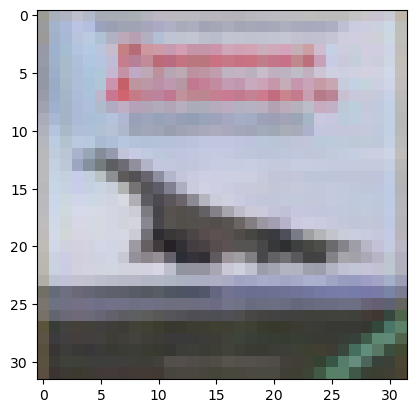

In [177]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', data_cifar10.classes[label], ', Predicted:', predict_image(img, model))

Label: truck , Predicted: truck


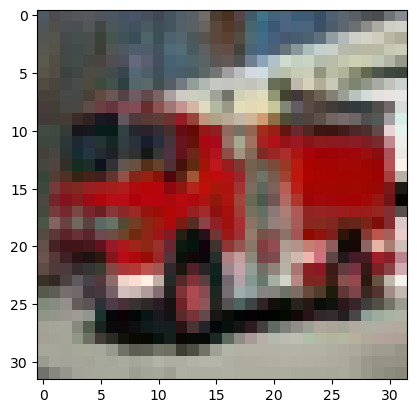

In [181]:
img, label = test_dataset[9002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', data_cifar10.classes[label], ', Predicted:', predict_image(img, model))